# MODELING CUSTOMER CHOICE


Objective: Modeling customer choice (featured as Channel) through customer buying behavior of variety of grocery products which includes Fresh, Milk, Grocery, Frozen, Detergents_Paper, Delicassen.

In [1]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from sklearn import metrics
from sklearn.metrics import precision_recall_fscore_support
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Load the marketing data using pandas:
data= pd.read_csv(r'MarketingData.csv')
data.head(5)

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Channel
0,6623.613537,5513.093240,6019.057354,5669.568008,5898.660607,5179.234947,2
1,5642.542497,5829.866565,3960.339943,4270.020548,3498.818262,4327.423268,2
2,5292.078175,6634.370556,4444.335138,4888.286021,3265.391352,4887.560190,2
3,5595.227928,4754.860698,2977.856511,3462.490957,3609.264559,4268.641413,0
4,5126.693267,6009.649079,3811.569943,4744.115976,3829.516831,5097.491872,2


In [4]:
#Check the shape, the missing values, and show the summary report of the data:
data.shape

(20000, 7)

In [5]:
#Check for missing values
data.isnull().values.any()

False

In [6]:
#See the summary report
data.describe()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Channel
count,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000
mean,5853.350191,5267.873868,4873.362341,4899.477763,4786.331781,5613.672184,1.499350
std,1128.370297,1177.563192,1265.579790,1220.923393,1154.682284,1343.743103,1.118464
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,5155.249455,4438.167387,3983.317183,4071.997222,3877.943500,4705.582182,0.000000
50%,5988.720207,5337.741327,4828.100401,5048.099489,4857.070488,5425.888761,1.000000
75%,6573.895741,6081.755179,5784.992859,5684.876863,5602.146034,6574.281056,3.000000
max,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,3.000000


In [7]:
#Check the target variable Channel
data['Channel'].value_counts()

0    5007
3    5002
1    5001
2    4990
Name: Channel, dtype: int64

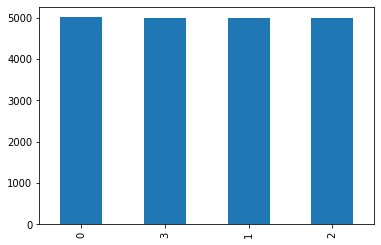

In [83]:
data['Channel'].value_counts().plot(kind='bar')

In [8]:
#Split the data into training and testing sets
target = 'Channel'
X = data.drop(['Channel'],axis=1)
y=data[target]


In [9]:
# Fit a random forest classifier and store the model in a clf_random variable:
X_train, X_test, y_train, y_test = train_test_split(X.values,y,test_size=0.20, random_state=123, stratify=y)

In [10]:
clf_random = RandomForestClassifier(n_estimators=20, max_depth=None,
     min_samples_split=7, random_state=0)
clf_random.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=7,
                       min_weight_fraction_leaf=0.0, n_estimators=20,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [11]:
#Predict on the test data and store the predictions in y_pred
y_pred=clf_random.predict(X_test)

In [12]:
#Find out the micro- and macro-average report
precision_recall_fscore_support(y_test, y_pred, average='macro')

(0.8910950272506314, 0.8910093250373001, 0.891010381018051, None)

In [13]:
precision_recall_fscore_support(y_test, y_pred, average='micro')

(0.891, 0.891, 0.891, None)

In [14]:
#Print the classification report
target_names = ["Retail","RoadShow","SocialMedia","Televison"]
print(classification_report(y_test, y_pred,target_names=target_names))


              precision    recall  f1-score   support

      Retail       0.90      0.90      0.90      1002
    RoadShow       0.87      0.85      0.86      1000
 SocialMedia       0.93      0.92      0.92       998
   Televison       0.87      0.89      0.88      1000

    accuracy                           0.89      4000
   macro avg       0.89      0.89      0.89      4000
weighted avg       0.89      0.89      0.89      4000



In [15]:
#Plot the confusion matrix
cm = confusion_matrix(y_test, y_pred) 

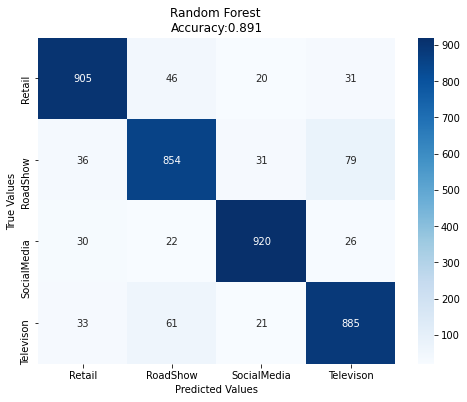

In [16]:
cm_df = pd.DataFrame(cm,
                     index = target_names, 
                     columns = target_names)
plt.figure(figsize=(8,6))
sns.heatmap(cm_df, annot=True,fmt='g',cmap='Blues')
plt.title('Random Forest \nAccuracy:{0:.3f}'.format(accuracy_score(y_test, y_pred)))
plt.ylabel('True Values')
plt.xlabel('Predicted Values')
plt.show()


## Dealing with Imablanced Data

In [17]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from collections import Counter

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


In [58]:
#Read the dataset into a pandas DataFrame named bank and look at the first few rows of the data:
bank = pd.read_csv('bank.csv', sep = ';')
bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [59]:
#Rename the y column as Target
bank = bank.rename(columns={'y': 'Target'})

In [60]:
#Replace the no value with 0 and yes with 1
bank['Target']=bank['Target'].replace({'no': 0, 'yes': 1})

In [61]:
#Check the shape and missing values in the data:
print(bank.shape)
print(bank.isnull().values.any())

(4334, 17)
False


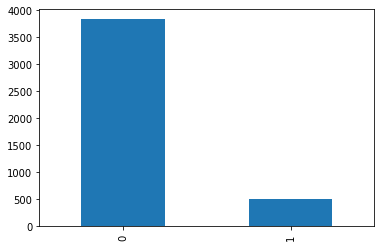

In [62]:
#Use the describe function to check the continuous and categorical values
bank['Target'].value_counts().plot(kind='bar')

In [63]:
#Use the cat.codes function to encode the job, marital, default, housing, loan, contact, and poutcome columns
bank["job"] = bank["job"].astype('category').cat.codes
bank["marital"] = bank["marital"].astype('category').cat.codes
bank["default"] = bank["job"].astype('category').cat.codes
bank["housing"] = bank["marital"].astype('category').cat.codes
bank["loan"] = bank["loan"].astype('category').cat.codes
bank["contact"] = bank["contact"].astype('category').cat.codes
bank["poutcome"] = bank["poutcome"].astype('category').cat.codes

In [64]:
#Since education and month are ordinal columns, we need to convert them nominal type.
bank['education']=bank['education'].replace({'primary': 0, 'secondary': 1,'tertiary':2})
bank['month']=bank['month'].astype(str)
bank['month']=bank['month'].replace({'jan':1, 'feb':2, 'mar':3,'apr':4,
                                     'may':5,'jun':6,'jul':7,'aug':8,
                                     'sep':9,'oct':10,'nov':11,'dec':12})
# bank['education']=bank['education'].replace({'primary': 0, 'secondary': 1,'tertiary':2})
# bank['month'].replace(['jan', 'feb', 'mar','apr','may','jun','jul','aug','sep','oct','nov','dec'], [1,2,3,4,5,6,7,8,9,10,11,12], inplace  = True)

In [65]:
#Recheck the bank data after conversion
bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,30,10,1,0,10,1787,1,0,0,19,10,79,1,-1,0,3,0
1,33,7,1,1,7,4789,1,1,0,11,5,220,1,339,4,0,0
2,35,4,2,2,4,1350,2,0,0,16,4,185,1,330,1,0,0
3,30,4,1,2,4,1476,1,1,2,3,6,199,4,-1,0,3,0
4,59,1,1,1,1,0,1,0,2,5,5,226,1,-1,0,3,0


In [66]:
bank['month'].value_counts()

5     1339
7      681
8      618
6      495
11     377
4      288
2      213
1      136
10      75
3       47
9       47
12      18
Name: month, dtype: int64

In [67]:
#Split the data into training and testing sets using train_test_split, as follows:
target = 'Target'
X = bank.drop(['Target'], axis=1)
y=bank[target]

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.15, random_state=123, stratify=y)

In [68]:
#Check the number of classes in y_train and y_test:
print(sorted(Counter(y_train).items()))
print(sorted(Counter(y_test).items()))

[(0, 3256), (1, 427)]
[(0, 576), (1, 75)]


In [69]:
#Use the standard_scalar function to transform the X_train and X_test data.
#Assign it to the X_train_sc and X_test_sc variables
standard_scalar = StandardScaler()
X_train_sc = standard_scalar.fit_transform(X_train)
X_test_sc = standard_scalar.transform(X_test)

In [70]:
#Call the random forest classifier 
# with parameters n_estimators=20, max_depth=None, min_samples_split=7, and random_state=0:
clf_random = RandomForestClassifier(n_estimators=20, max_depth=None,
min_samples_split=7, random_state=0)

In [71]:
#Fit the random forest model:
clf_random.fit(X_train_sc,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=7,
                       min_weight_fraction_leaf=0.0, n_estimators=20,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [72]:
#Predict on the test data using the random forest model
y_pred=clf_random.predict(X_test_sc)

In [74]:
#Get the classification report
target_names = ['No', 'Yes']
print(classification_report(y_test, y_pred,target_names=target_names))
cm = confusion_matrix(y_test, y_pred) 

              precision    recall  f1-score   support

          No       0.92      0.98      0.95       576
         Yes       0.67      0.32      0.43        75

    accuracy                           0.90       651
   macro avg       0.79      0.65      0.69       651
weighted avg       0.89      0.90      0.89       651



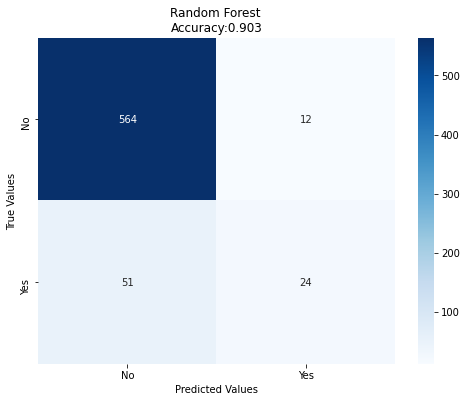

In [75]:
#Get the confusion matrix
cm_df = pd.DataFrame(cm,
                     index = ['No', 'Yes'], 
                     columns = ['No', 'Yes'])
plt.figure(figsize=(8,6))
sns.heatmap(cm_df, annot=True,fmt='g',cmap='Blues')
plt.title('Random Forest \nAccuracy:{0:.3f}'.format(accuracy_score(y_test, y_pred)))
plt.ylabel('True Values')
plt.xlabel('Predicted Values')
plt.show()

In [76]:
#Use the smote() function on x_train and y_train.
#Assign it to the x_resampled and y_resampled variables, respectively
X_resampled, y_resampled = SMOTE().fit_resample(X_train,y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [77]:
#Use standard_scalar to fit on x_resampled and x_test.
#Assign it to the X_train_sc_resampled and X_test_sc variables:
standard_scalar = StandardScaler()
X_train_sc_resampled = standard_scalar.fit_transform(X_resampled)
X_test_sc = standard_scalar.transform(X_test)

In [79]:
#Fit the random forest classifier on X_train_sc_resampled and y_resampled:
clf_random.fit(X_train_sc_resampled,y_resampled)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=7,
                       min_weight_fraction_leaf=0.0, n_estimators=20,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [80]:
#Predict on X_test_sc
y_pred=clf_random.predict(X_test_sc)

In [81]:
#Generate the classification report
target_names = ['No', 'Yes']
print(classification_report(y_test, y_pred,target_names=target_names))

              precision    recall  f1-score   support

          No       0.95      0.91      0.93       576
         Yes       0.48      0.63      0.54        75

    accuracy                           0.88       651
   macro avg       0.71      0.77      0.74       651
weighted avg       0.90      0.88      0.89       651



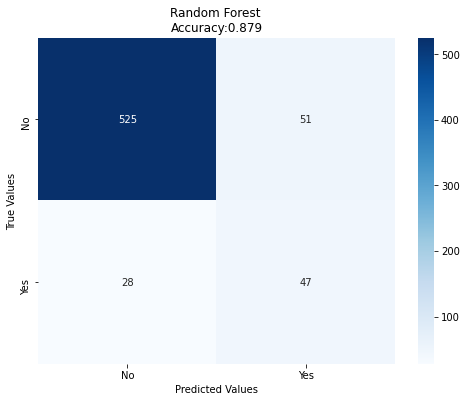

In [82]:
#Plot the confusion matrix
cm = confusion_matrix(y_test, y_pred) 

cm_df = pd.DataFrame(cm,
                     index = ['No', 'Yes'], 
                     columns = ['No', 'Yes'])
plt.figure(figsize=(8,6))
sns.heatmap(cm_df, annot=True,fmt='g',cmap='Blues')
plt.title('Random Forest \nAccuracy:{0:.3f}'.format(accuracy_score(y_test, y_pred)))
plt.ylabel('True Values')
plt.xlabel('Predicted Values')
plt.show()

From the results, our bank marketing data was highly imbalanced. We observed that, although without using a sampling technique our model accuracy is around 90%, the recall score and macro-average score was 32% (Yes - Term Deposit) and 65%, respectively. This implies that our model is not able to generalize, and most of the time it misses potential customers who would subscribe to the term deposit.

On the other hand, when we used SMOTE, our model accuracy was around 87%, but the recall score and macro-average score was 63% (Yes - Term Deposit) and 77%, respectively. This implies that our model can generalize and, more than 60% of the time, it detects potential customers who would subscribe to the term deposit.